In [29]:
import numpy as np 
import scanpy as sc
from anndata import AnnData
from scipy import sparse
from tqdm.notebook import tqdm
import pandas as pd

In [31]:
adata = sc.read_h5ad('data/embedding_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 53315 × 1197
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'Study', 'Assay', 'Platform', 'Sample', 'Patient_No', 'Timepoint', 'INSS_stage', 'MYCN_amplification', 'Gender', 'Risk', 'Cell_condition', 'Cell_type', 'cell', 'n_genes', 'leiden', 'cnv_leiden', 'cnv_score', 'cnv_status', 'Stage_Code', 'Tissue', 'Risk_Category', 'First_Avail_TP', 'MYCN_Status', 'ALK_Status', 'TP53_Status', 'Response', 'Vital_Status', 'Age_at_IDX_in_months', 'Treatment', 'First_Avail_Time_Point', 'sample_name', 'biospecimen_id', 'percent.mt', 'seurat_clusters', 'sample_label_wo_prefix', 'S.Score', 'G2M.Score', 'Phase', 'malignancy', 'cell_state', 'RNA_snn_res.0.2', 'MES_Score', 'ADRN_Score', 'MES_ADRN_diff', 'Event', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'tissue_type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'tissue_ontology_te

In [23]:
ds2 = adata[pd.isna(adata.obs['cell_state']) == False].copy()

In [26]:
pd.isna(ds2.obs['cell_type']).sum()

0

In [27]:
ds2.obs['donor_id']

NB_7767_1774_REG1___AAACCCACAAAGGCAC-1-1    CH_16
NB_7767_1774_REG1___AAACGAAGTCACGACC-1-1    CH_16
NB_7767_1774_REG1___AAACGCTCATTGACAC-1-1    CH_16
NB_7767_1774_REG1___AAAGTCCGTGGCCACT-1-1    CH_16
NB_7767_1774_REG1___AAAGTCCTCTATCCAT-1-1    CH_16
                                            ...  
NB_7767_963_REG2___TGCAGTAAGCACCGTC-1-1     CH_19
NB_7767_963_REG2___TGGAACTTCAATCCAG-1-1     CH_19
NB_7767_963_REG2___TGGTGATCAGACAATA-1-1     CH_19
NB_7767_963_REG2___TGTGGCGGTGTGTCGC-1-1     CH_19
NB_7767_963_REG2___TTTCATGTCATCTCTA-1-1     CH_19
Name: donor_id, Length: 49131, dtype: category
Categories (22, object): ['CH_01', 'CH_02', 'CH_03', 'CH_04', ..., 'CH_19', 'CH_20', 'CH_22', 'CH_23']

In [3]:
adata.write_h5ad('data/snlong2025_compressed.h5ad', compression='gzip')

In [5]:

data = bdata.X.data  # Get the non-zero values


# Get the 10 largest values (partial sort, efficient)
top_10_values = np.partition(data, -10)[-10:]  # Partial sort last 10 elements
top_10_values_sorted = np.sort(top_10_values)  # Optional: Sort them ascending
print("Top 10 values:", top_10_values_sorted[::-1])  # Print descending

Top 10 values: [10538.  5423.  4673.  4507.  4459.  4382.  3909.  3862.  3675.  3342.]


In [ ]:
sc.pp.log1p(bdata)
sc.pp.highly_variable_genes(bdata, n_top_genes=1200-1, flavor='seurat', batch_key='SAMPLES_JOINT')

/opt/anaconda3/envs/cancerGPT/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


ZeroDivisionError: division by zero

In [35]:
bdata.write_h5ad('./data/combined_dataset.h5ad', compression='gzip')

In [18]:
if np.any(np.isnan(bdata.X.data)) or np.any(np.isinf(bdata.X.data)):
        print("Data contains NaN or infinite values!")

In [11]:
bdata.var['gene_name'] = bdata.var.index
bdata.var['gene_name']

SAMD11            SAMD11
NOC2L              NOC2L
KLHL17            KLHL17
PLEKHN1          PLEKHN1
PERM1              PERM1
                 ...    
AC008537.1    AC008537.1
AC011462.1    AC011462.1
AC010616.1    AC010616.1
AC007326.4    AC007326.4
SMIM34B          SMIM34B
Name: gene_name, Length: 18636, dtype: object

## umap test

In [7]:
#UMAP plot before model
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/opt/anaconda3/envs/cancerGPT/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


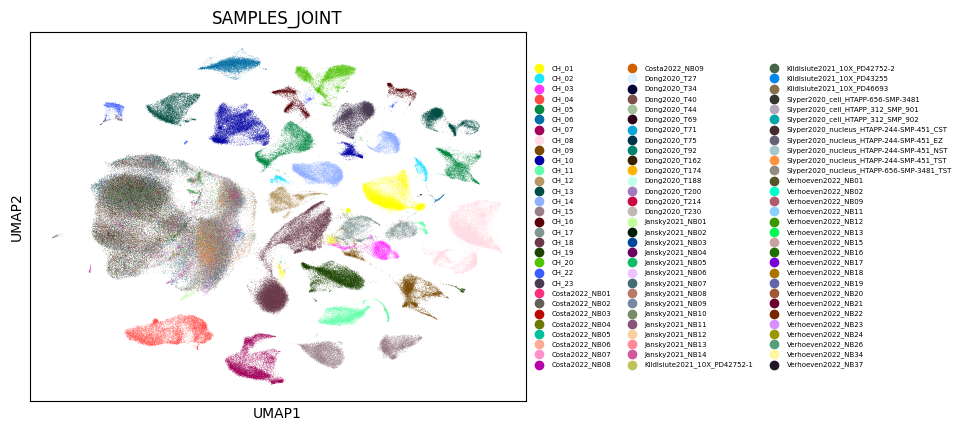

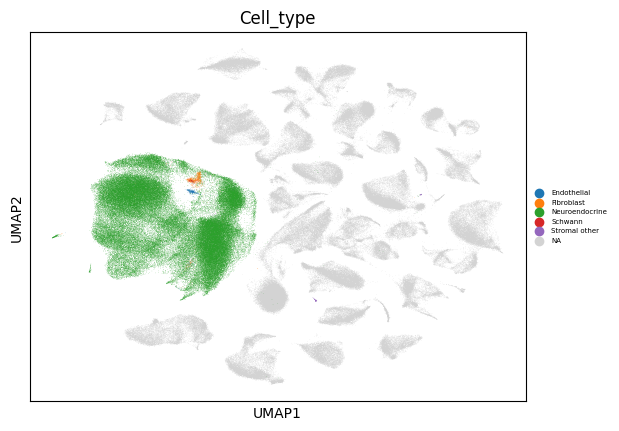

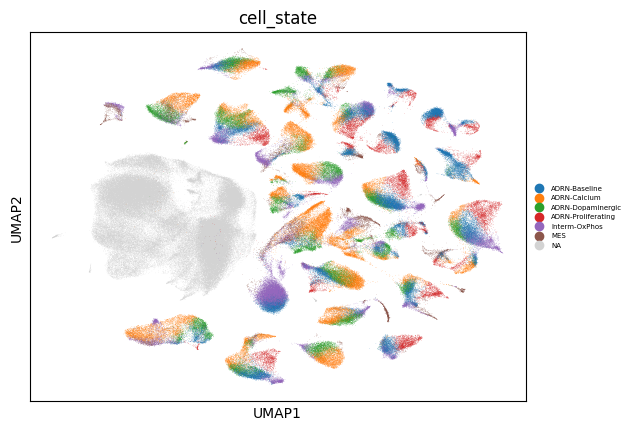

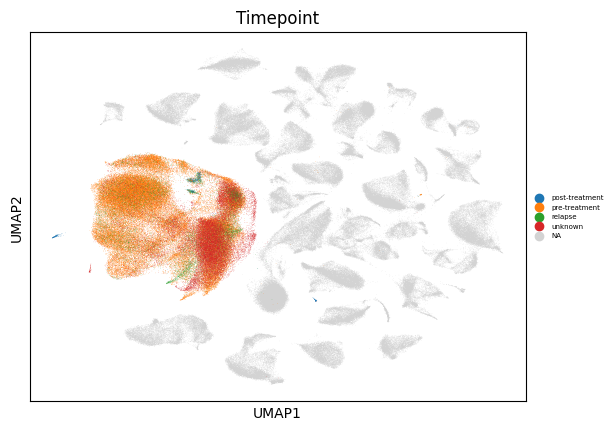

In [8]:
umap_obs = ['SAMPLES_JOINT', 'Cell_type', 'cell_state', 'Timepoint']
for feature in umap_obs:
    sc.pl.umap(adata, color=feature, legend_fontsize=5)